##Importing libraries & Dataset

In [26]:
import pandas as pd
import numpy as np

In [27]:
dataset = pd.read_csv('/content/winequality-red.csv')

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [29]:
X = dataset.iloc[: ,:-1].values
y = dataset.iloc[:, -1].values

##Splitting data into training and test set

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

##Train on Different Algorithms

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [33]:
m_reg = LinearRegression()
p_reg = LinearRegression()
d_reg = DecisionTreeRegressor()
r_reg = RandomForestRegressor(n_estimators=500)

In [34]:
X_poly = PolynomialFeatures(degree = 5)
X_poly = X_poly.fit_transform(X_train)

In [35]:
m_reg.fit(X_train, y_train)
p_reg.fit(X_poly,y_train)
d_reg.fit(X_train, y_train)
r_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [36]:
temp = PolynomialFeatures(degree = 5)
temp = temp.fit_transform(X_test)

In [37]:
m_pred = m_reg.predict(X_test)
p_pred = p_reg.predict(temp)
d_pred = d_reg.predict(X_test)
r_pred = r_reg.predict(X_test)

In [38]:
from sklearn.metrics import r2_score

In [39]:
m = r2_score(y_test, m_pred)
p = r2_score(y_test, p_pred)
d = r2_score(y_test, d_pred)
r = r2_score(y_test, r_pred)

In [40]:
print(m, p, d, r)

0.3671570734589302 -21531.49367960178 0.04514299220042539 0.5194081021035216


Quality check


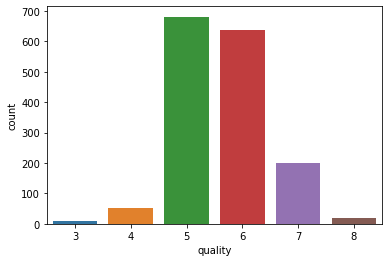

In [41]:
import seaborn as sns
sns.countplot(x='quality', data=dataset)

In [42]:
dataset['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [45]:
cond = [(dataset['quality']>=7.5), (dataset['quality']<7.5)]
gb = ['Good', 'Bad']
dataset['review'] = np.select(cond, gb)

In [46]:
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,review
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Bad
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Bad
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Bad
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Bad
